# Sales Analysis

### Import nessasary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import data and Concat them to a single Data Frame

In [3]:
import os

In [18]:

files  = [file for file in os.listdir('./Sales_Data')]

all_month_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_month_data = pd.concat([all_month_data,df])

In [19]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [20]:
## Make a copy from Original Data Frame called all Data

all_data = all_month_data.copy()
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Preprocessing

In [21]:
all_data.shape

(186850, 6)

In [22]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [24]:
## handling Missing Values

all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [27]:
all_data.dropna(how='all',inplace=True)

In [28]:
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [31]:
all_data['Quantity Ordered'].value_counts()

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity Ordered, dtype: int64

In [32]:
all_data[all_data['Quantity Ordered'] == 'Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [33]:
all_data = all_data[all_data['Quantity Ordered'] != 'Quantity Ordered']

In [36]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [35]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  int32 
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: int32(1), object(5)
memory usage: 9.2+ MB


In [37]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

C:\Users\Dilransa\AppData\Local\Temp\ipykernel_14964\2543375831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
C:\Users\Dilransa\AppData\Local\Temp\ipykernel_14964\2543375831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = all_data['Price Each'].astype(float)
C:\Users\Dilransa\AppData\Local\Temp\ipykernel_14964\2543375831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [38]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.2+ MB


In [40]:
all_data.duplicated().sum()

264

In [42]:
all_data.drop_duplicates(inplace=True)

C:\Users\Dilransa\AppData\Local\Temp\ipykernel_14964\3952881442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.drop_duplicates(inplace=True)


### Data Exploration !
Question 1: What was the best month for sales? How much was earned that month?
Question 2: What city sold the most product?
Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?
Question 4:What product sold the most? Why do you think it sold the most?

#### What was the best month for sales? How much was earned that month?

In [43]:
all_data['Month'] = all_data['Order Date'].dt.month

In [44]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [47]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [57]:
figure_1 = all_data.groupby('Month')['Sales'].sum().to_frame()
figure_1.head()

,Sales
Month,
1,1821413.16
2,2200078.08
3,2804973.35
4,3389217.98
5,3150616.23


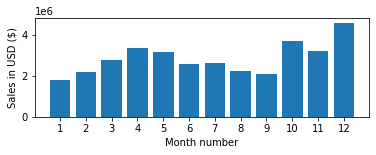

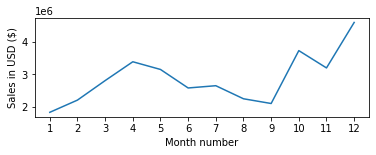

In [66]:

plt.subplot(2,1,1)
plt.bar(figure_1.index,figure_1['Sales'])
plt.xticks(figure_1.index)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')

plt.show()




plt.subplot(2,1,2)
plt.plot(figure_1.index,figure_1['Sales'])
plt.xticks(figure_1.index)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### What city sold the most product?

In [67]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [69]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[1])

In [70]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [72]:
figure_2 = all_data.groupby('City')['Sales'].sum().to_frame()

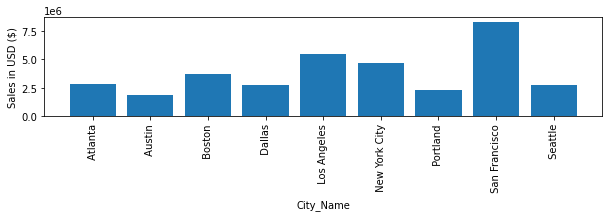

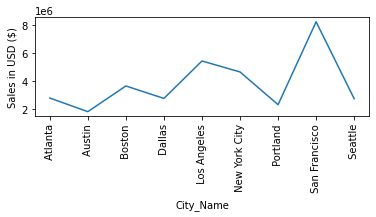

In [77]:

plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.bar(figure_2.index,figure_2['Sales'])
plt.xticks(figure_2.index , rotation = 'vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City_Name')

plt.show()


plt.subplot(2,1,2)
plt.plot(figure_2.index,figure_2['Sales'])
plt.xticks(figure_2.index , rotation = 'vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City_Name')
plt.show()

#### What time should we display advertisements to maximize likelihood of customer's buying product?

In [78]:
all_data['Hour'] = all_data['Order Date'].dt.hour

In [79]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


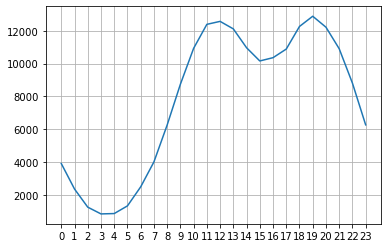

In [87]:
keys = [key for key, df  in all_data.groupby('Hour')]


plt.plot(keys,all_data.groupby('Hour').count()['Quantity Ordered'])
plt.xticks(keys)
plt.grid()

plt.show()

In [83]:
all_data.groupby('Hour').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Hour,,,,,,,,,
0,3902,3902,3902,3902,3902,3902,3902,3902,3902
1,2347,2347,2347,2347,2347,2347,2347,2347,2347
2,1242,1242,1242,1242,1242,1242,1242,1242,1242
3,830,830,830,830,830,830,830,830,830
4,852,852,852,852,852,852,852,852,852
5,1320,1320,1320,1320,1320,1320,1320,1320,1320
6,2481,2481,2481,2481,2481,2481,2481,2481,2481
7,4002,4002,4002,4002,4002,4002,4002,4002,4002
8,6252,6252,6252,6252,6252,6252,6252,6252,6252


#### What product sold the most? Why do you think it sold the most?

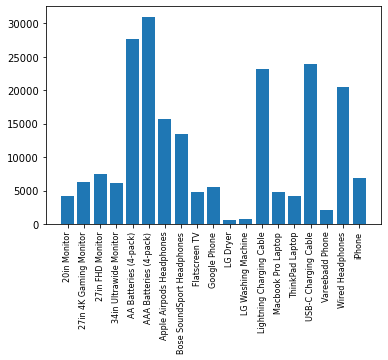

In [88]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\Dilransa\AppData\Local\Temp\ipykernel_14964\244484573.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\Dilransa\AppData\Local\Temp\ipykernel_14964\244484573.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


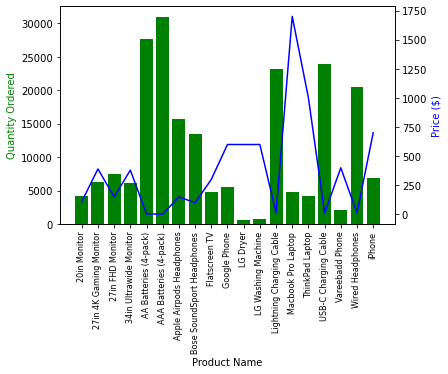

In [89]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()